In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
training_data_path = 'D:/永豐攻房戰/30_Training Dataset_V2/training_data.csv'
training_data_df = pd.read_csv(training_data_path)
target = training_data_df[['單價']] # 1 target
target = target.to_numpy()
numeric_data = training_data_df[['土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標', '主建物面積', '陽台面積', '附屬建物面積']] # 12 features
numeric_data = numeric_data.to_numpy()
ids = training_data_df[['ID']]
ids = ids.to_numpy()
print(target.shape)
print(numeric_data.shape)
print(ids.shape)

(11751, 1)
(11751, 12)
(11751, 1)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler_X, scaler_Y = StandardScaler(), StandardScaler()
scaler_X.fit(numeric_data)
scaler_Y.fit(target)
X_scaled = scaler_X.transform(numeric_data)
Y_scaled = scaler_Y.transform(target)
print(scaler_X.mean_)
print(scaler_X.var_)
print(scaler_Y.mean_)
print(scaler_Y.var_)

[1.84163432e-02 7.43366522e+00 1.26026721e+01 2.13190580e+01
 3.05170691e-02 2.10302780e-02 6.38669049e-01 2.68260432e+05
 2.71911394e+06 2.66228740e-02 2.48760840e-02 2.36211399e-02]
[1.14968504e+00 2.58960124e+01 4.67817102e+01 2.08079068e+02
 1.17409323e+00 1.06229359e+00 4.59857781e-01 2.50633873e+09
 8.59487328e+09 1.16063641e+00 1.15005642e+00 1.38698118e+00]
[1.99334279]
[1.00407633]


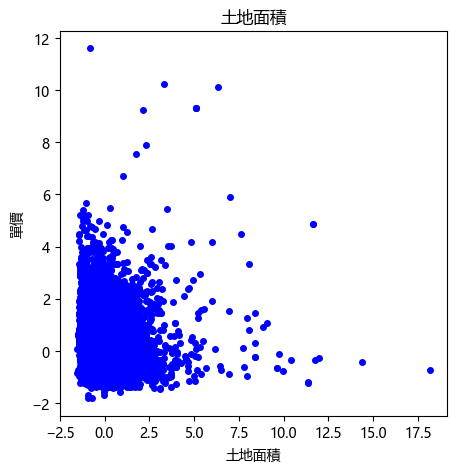

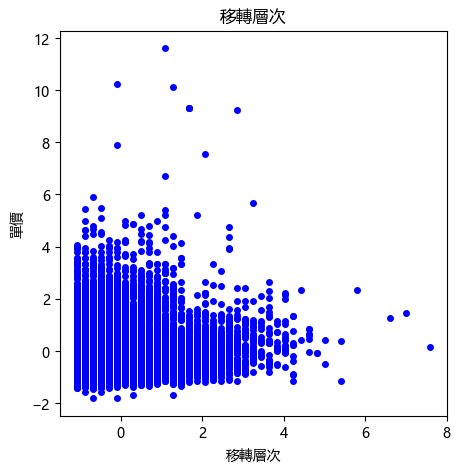

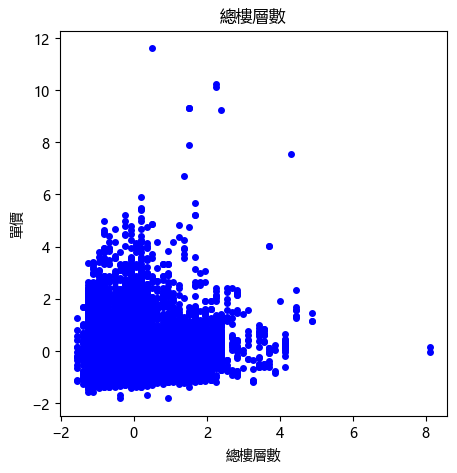

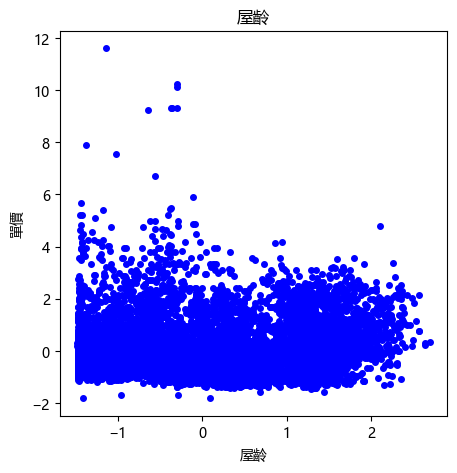

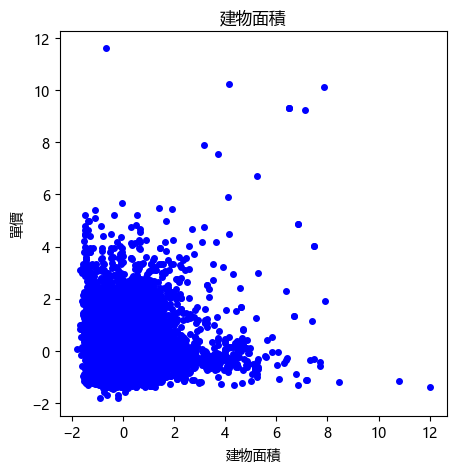

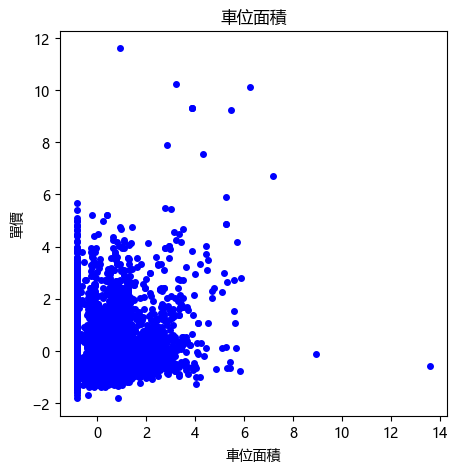

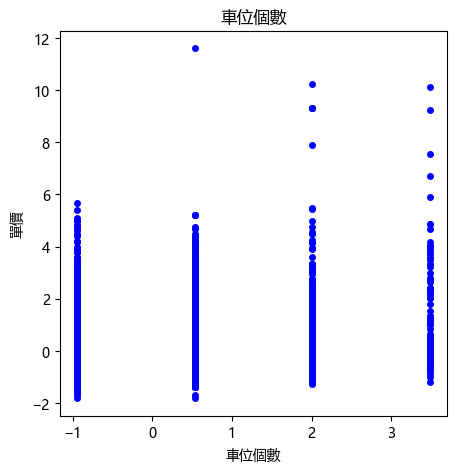

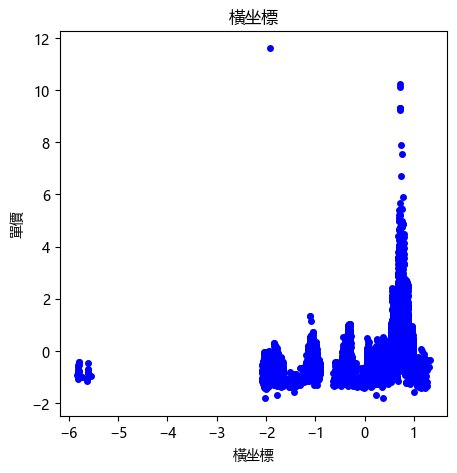

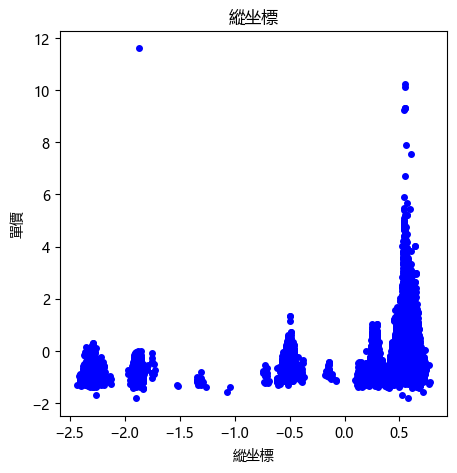

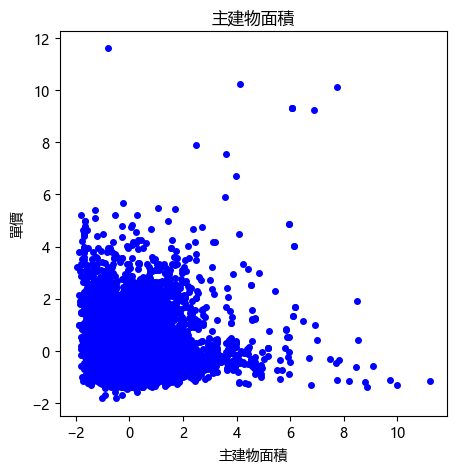

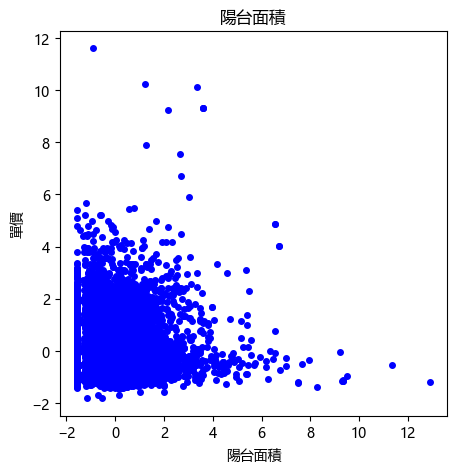

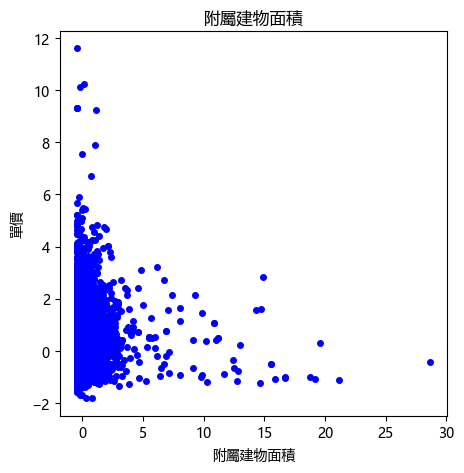

In [4]:
feature_names = ['土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標', '主建物面積', '陽台面積', '附屬建物面積']
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
for i, name in enumerate(feature_names):
    plt.figure(figsize=(5, 5))
    plt.plot(X_scaled[:, i], Y_scaled[:, 0], 'bo', markersize=4)
    plt.title(name)
    plt.xlabel(name)
    plt.ylabel('單價')
    plt.show()

In [8]:
print(ids)

[['TR-1']
 ['TR-2']
 ['TR-3']
 ...
 ['TR-11749']
 ['TR-11750']
 ['TR-11751']]


In [9]:
np.save('./Numeric_feature_dataset/ids.npy', ids)
np.save('./Numeric_feature_dataset/features12_norm.npy', scaler_X)
np.save('./Numeric_feature_dataset/target_norm.npy', scaler_Y)